### Training a simple convolutional neural network on the MNIST dataset

#### Import packages
Here we are using [Keras](https://github.com/keras-team/keras) with [TensorFlow](https://www.tensorflow.org/) to develop a **convolutional neural network (CNN)** to training the classification of digits in the [mnist dataset](http://yann.lecun.com/exdb/mnist/).

Source: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

In [ ]:
! nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-df3ce1e0-c988-5f41-fbed-523f69f652e1)


In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')


We explicitly define our MNIST image dimensions which will be used later to reshape our data.

In [ ]:
img_rows, img_cols = 28, 28

#### Load data
We load our MNIST data like is the same way as we did in the earlier lab.

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)



Using tf.keras.layers.Conv2D
============================
(https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. 

When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers, does not include the sample axis), e.g. input_shape=(128, 128, 3) for 128x128 RGB pictures in data_format="channels_last".<br><br>

data_format: A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs. channels_last corresponds to inputs with shape (batch, height, width, channels) while channels_first corresponds to inputs with shape (batch, channels, height, width). .





#### Data preprocessing 

In [ ]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

We also normalize the pixel values and convert class vectors to binary class matrices like we did previously.

In [ ]:
num_classes = 10
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Comment out the two lines below to remove the normalization
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### What does it mean to be a convolutional neural network?

#### Three steps to create a CNN
1. Convolution
2. Non-linearity activation
3. Pooling

Repeat Steps 1,2,3 for adding more hidden layers.

4. After that make a fully connected network

This fully connected network gives ability to the CNN to classify the samples.

#### 1. Convolution

Blue maps are inputs, and cyan maps are outputs.

<table style="width:100%; table-layout:fixed;">
  <tr>
    
    <td href="https://drive.google.com/uc?export=view&id=1N14O_UPfzeIr1VtnljBeCw9v3Lmn0J4P"><img src="https://drive.google.com/uc?export=view&id=1N14O_UPfzeIr1VtnljBeCw9v3Lmn0J4P" style="width: 200px; max-width: 100%; height: auto" title="Click for the larger version." /></td>
<td    href="https://drive.google.com/uc?export=view&id=10GFWz3vgFlKr1jw_CLguPy_pwbTrVeSS"><img src="https://drive.google.com/uc?export=view&id=10GFWz3vgFlKr1jw_CLguPy_pwbTrVeSS" style="width: 200px; max-width: 100%; height: auto" title="Click for the larger version." /></td>
<td href="https://drive.google.com/uc?export=view&id=1l2GMl_L3hb0E3ZfOxVkIV236nm1O7QH4"><img src="https://drive.google.com/uc?export=view&id=1l2GMl_L3hb0E3ZfOxVkIV236nm1O7QH4" style="width: 200px; max-width: 100%; height: auto" title="Click for the larger version." /></td>
    <td href="https://drive.google.com/uc?export=view&id=1Er0Pj2AErsL1-iHLrKpGsfbsiBkLTbsz"><img src="https://drive.google.com/uc?export=view&id=1Er0Pj2AErsL1-iHLrKpGsfbsiBkLTbsz" style="width: 200px; max-width: 100%; height: auto" title="Click for the larger version." /></td>
  </tr>
  <tr >
    <td >No padding, unit strides</td>
    <td>Padding = 2 , unit strides</td>
    <td>Unit padding, unit strides</td>
    <td>Padding = 2, unit strides</td>
  </tr>
  <tr>
 <td href="https://drive.google.com/uc?export=view&id=1tzS2oe27TRsiaecNx-ZzNgLjl40gmOH9"><img src="https://drive.google.com/uc?export=view&id=1tzS2oe27TRsiaecNx-ZzNgLjl40gmOH9" style="width: 200px; max-width: 100%; height: auto" title="Click for the larger version." /></td>
<td href="https://drive.google.com/uc?export=view&id=1t5jxwh8XEm1a9DQCFcwr_cOrsGMLcSwM"><img src="https://drive.google.com/uc?export=view&id=1t5jxwh8XEm1a9DQCFcwr_cOrsGMLcSwM" style="width: 200px; max-width: 100%; height: auto" title="Click for the larger version." /></td>
<td href="https://drive.google.com/uc?export=view&id=1Ov7r_3FhbIOum19KbCcRqdrHo0MUQOj8"><img src="https://drive.google.com/uc?export=view&id=1Ov7r_3FhbIOum19KbCcRqdrHo0MUQOj8" style="width: 200px; max-width: 100%; height: auto" title="Click for the larger version." /></td>

    <td></td>
  </tr>
  <tr>
    <td>No padding, stride = 2</td>
    <td> Unit padding, stride = 2, even dimension image</td>
    <td>Unit padding, stride =2, odd dimension image</td>
    <td></td>
  </tr>
</table>

#### 2. Activation functions

In [ ]:
# tf.keras.activations.softmax(x, axis=-1)

# tf.keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0.0)

# tf.keras.activations.tanh(x)

# tf.keras.activations.sigmoid(x)

Extra material:
- [A guide to convolution arithmetic for deep learning](https://arxiv.org/abs/1603.07285)


#### Building the LeNet-5  with Keras
We shall build a convolution neural network based from a  paper titled [Gradient-Based Learning Applied to Document Recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) in 1998 by Yann Lecun, Leon Bottou, Yoshua Bengio and Patrick Haffner.

<a href="https://drive.google.com/uc?export=view&id=1xUSdjU5rnMjiN374Hv0EdSc9RnLJrqun"><img src="https://drive.google.com/uc?export=view&id=1xUSdjU5rnMjiN374Hv0EdSc9RnLJrqun" style="width: 500px; max-width: 100%; height: auto" title="Click for the larger version." /></a>




In [ ]:
# Lenet

model = tf.keras.Sequential()

# first set of CONV => RELU => POOL
model.add(tf.keras.layers.Conv2D(6, kernel_size=(5,5), 
                        strides=(1,1),
                        padding='same', # adds sufficient padding to the input so that the output has same dimension as input
                        input_shape=input_shape,
                        use_bias=True, 
                        kernel_initializer='glorot_uniform',
                        bias_initializer='zeros'))

# Exercise : Complete the 3 activation functions
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# second set of CONV => RELU => POOL
model.add(tf.keras.layers.Conv2D(16, kernel_size=(5,5), 
                        padding='valid'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model.add(tf.keras.layers.Conv2D(120, kernel_size=(5,5),
                 padding='valid'))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84))

# Classifier
model.add(tf.keras.layers.Dense(num_classes))

# Exercise : Complete the activation function of the classifier
model.add(tf.keras.layers.Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_6 (Activation)    (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 1, 1, 120)        

- `conv2d_1` has 6 filters each of dimension 25, plus bias of size 6 for each corresponding filter to give 156 parameters: (1*(5 * 5 * 6)) + 6 = 156
- `conv2d_2` has 16 filters each of dimension 25, acting on the 6 channels from the earlier layer plus bias of size 16 for each corresponding filter to give 2416 parameters: (6 *(25 * 16)) + 16 = 2416


In [ ]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training our model


Here we instantiate the values of hyperparameters that we will be using later. 

In [ ]:
batch_size = 128
num_classes = 10
epochs = 20

In [ ]:
model_log = model.fit(x_train, y_train,
                      batch_size=batch_size, # number of samples to be used for each gradient update
                      epochs=epochs, # number of iterations over the entire x_train data#                      
                      validation_split = 0.1, #validation_data=(x_test, y_test), # on which to evaluate loss and model metrics at the end of each epoch
                     )

Epoch 1/20
422/422 [==============================] - 2s 4ms/step - loss: 1.3603 - accuracy: 0.6076 - val_loss: 0.3960 - val_accuracy: 0.8837
Epoch 2/20
422/422 [==============================] - 2s 4ms/step - loss: 0.3599 - accuracy: 0.8892 - val_loss: 0.2297 - val_accuracy: 0.9360
Epoch 3/20
422/422 [==============================] - 2s 4ms/step - loss: 0.2499 - accuracy: 0.9248 - val_loss: 0.1685 - val_accuracy: 0.9530
Epoch 4/20
422/422 [==============================] - 2s 4ms/step - loss: 0.1899 - accuracy: 0.9429 - val_loss: 0.1367 - val_accuracy: 0.9623
Epoch 5/20
422/422 [==============================] - 2s 4ms/step - loss: 0.1529 - accuracy: 0.9545 - val_loss: 0.1107 - val_accuracy: 0.9697
Epoch 6/20
422/422 [==============================] - 2s 4ms/step - loss: 0.1289 - accuracy: 0.9616 - val_loss: 0.0991 - val_accuracy: 0.9725
Epoch 7/20
422/422 [==============================] - 2s 4ms/step - loss: 0.1127 - accuracy: 0.9657 - val_loss: 0.0927 - val_accuracy: 0.9722
Epoch 

## Plotting out the accuracy and loss
Below we plot out the trend of the accuracy and loss of both the training set and validation set.

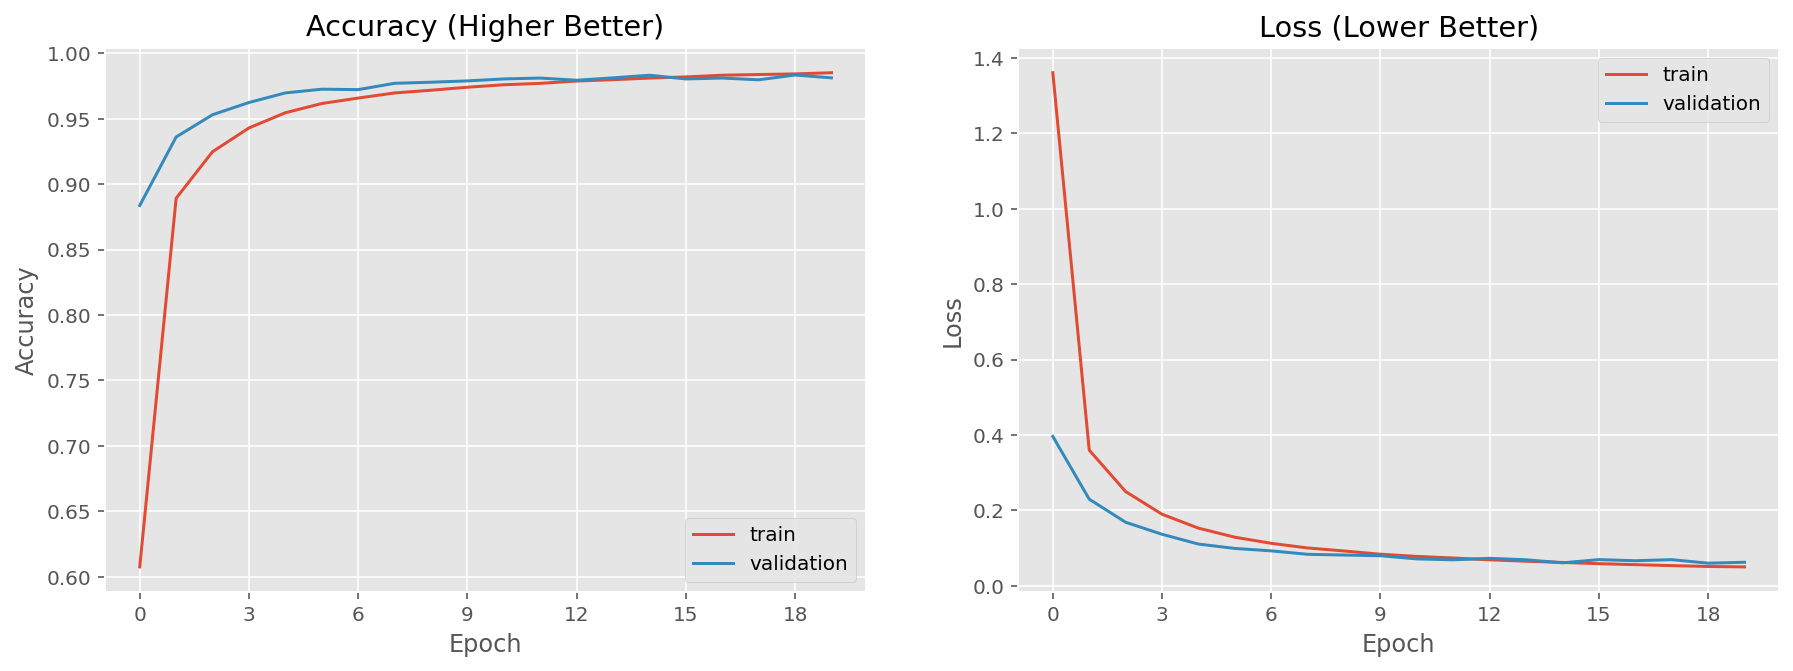

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06226453185081482
Test accuracy: 0.9796000123023987


#### Visualizing the wrongly classified data

In [ ]:
output = model.predict_classes(x_test)
print (output)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[7 2 1 ... 4 5 6]


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
ind = np.where(np.equal(output, y_test)==0)

In [ ]:
err_x = x_test[ind[0]]
err_y = output[ind[0]]
print (err_x.shape)

(204, 28, 28)


In [ ]:
examples_per_class = 4
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for cls, cls_name in enumerate(classes):
  idxs = np.where(cls == err_y)
  idxs = np.random.choice(idxs[0], examples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
    plt.imshow(err_x[idx].astype('uint8'), cmap = 'gray')
    plt.axis('off')
    if i == 0:
      plt.title(cls_name)